## Chandra X-ray Data Analysis
#### For Problem Statement: ISRO Visualization Tool (Mid Prep 2)
#### Team Number 14

### Files analyzed:

acisf07302N003_evt2.fit   (Quasar 4C19.44) - Chandra Observation ID 7302

acisf07302N004_evt2.fit   (Pulsar SMC X-1) - Chandra Observation ID 1023


## 1. Installing required libraries:

(scipy, numpy, pandas, astropy, matplotlib, sklearn, naima)

In [323]:
!pip install naima

In [324]:
import naima

In [325]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter as filter
from scipy.fftpack import fft, ifft
import pandas as pd
from astropy.timeseries import BoxLeastSquares as bls
from astropy import units as u

In [326]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer 

In [327]:
!pip install stingray

In [328]:
from stingray import Lightcurve

In [329]:
import matplotlib as mpl
import seaborn

from matplotlib import pyplot as plt

import stingray as sr

from stingray import Lightcurve, Powerspectrum, AveragedPowerspectrum, Crossspectrum, AveragedCrossspectrum
from stingray import events
from stingray.events import EventList
import glob
import numpy as np
from astropy.modeling import models, fitting

from stingray.utils import excess_variance

## 2. Looking at the files:

In [330]:
hdulQuasar = fits.open('acisf07302N003_evt2.fits')  # Opens main event file for Quasar 4C19.44
hdulPulsar = fits.open('acisf01023N004_evt2.fits')  # Opens main event file for Pulsar SMC X-1

### For Quasar:

First, we look at the Quasar:

In [331]:
hdulQuasar.info()

Filename: acisf07302N003_evt2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    825   142550R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           7 BinTableHDU     28   1R x 2C   [1D, 1D]   


In [332]:
hdulQuasar[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HDUNAME = 'PRIMARY '                                                            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'ASC     '           / Source of FITS file                            
CREATOR = 'cxc - Version DS10.9' / tool that created this output                
CHECKSUM= 'R746R633R633R633'   / HDU checksum updated 2020-12-09T19:45:33       
DATASUM = '        '        

In [333]:
hdulQuasar[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   64 / width of table in bytes                        
NAXIS2  =               142550 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   19 / number of fields in each row                   
EXTNAME = 'EVENTS  '           / name of this binary table extension            
HDUNAME = 'EVENTS  '           / ASCDM block name                               
TTYPE1  = 'time    '           / S/C TT corresponding to mid-exposure           
TFORM1  = '1D      '           / format of field                                
TUNIT1  = 's       '        

In [334]:
hdulQuasar[1].data # Serial event data points as binary table

FITS_rec([(2.59913530e+08, 7, 1,  1667, 458, 404, 4375, 2106, 4333.887 , 4224.668 , 4028.0703, 3855.234 , 2575, 2128, 12066.586  ,  827,  22, 6, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          (2.59913530e+08, 7, 2,  1667, 528, 580, 4445, 2282, 4403.7544, 4048.4934, 3857.0442, 3936.8967,   58,   46,   306.5475 ,   21,  16, 4, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          (2.59913530e+08, 7, 2,  1667, 541, 580, 4458, 2282, 4415.8975, 4048.487 , 3848.1365, 3928.6443,   96,   81,   479.92664,   33,   8, 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          ...,
          (2.59986002e+08, 7, 2, 87837, 715, 431, 4632, 2133, 4590.5195, 4197.566 , 3793.5156, 3685.4126, 2982, 2905, 13801.64   ,  946,  22, 6, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
         

In [335]:
hdulQuasar[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
EXTNAME = 'GTI     '           / name of this binary table extension            
EXTVER  =                    7                                                  
HDUNAME = 'GTI7    '           / ASCDM block name                               
TTYPE1  = 'START   '           / S/C TT corresponding to mid-exposure           
TFORM1  = '1D      '        

In [336]:
hdulQuasar[2].data   # Gives us the GTI, we can use this to validate the start/ stop times

FITS_rec([(2.5991353e+08, 2.59986003e+08)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

### For Pulsar:

Next, we look at the Pulsar:

In [337]:
hdulPulsar.info()

Filename: acisf01023N004_evt2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   ()      
  1  EVENTS        1 BinTableHDU    877   70637R x 21C   [1D, 1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           7 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           5 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  7  GTI           8 BinTableHDU     28   1R x 2C   [1D, 1D]   


In [338]:
hdulPulsar[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HDUNAME = 'PRIMARY '                                                            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
LONGSTRN= 'OGIP 1.0'           / The HEASARC Long String Convention may be used.
COMMENT   This FITS file may contain long string keyword values that are        
COMMENT   continued over multiple keywords.  The HEASARC convention uses the &  
COMMENT   character at the e

In [339]:
hdulPulsar[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   76 / width of table in bytes                        
NAXIS2  =                70637 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   21 / number of fields in each row                   
EXTNAME = 'EVENTS  '           / name of this binary table extension            
HDUNAME = 'EVENTS  '           / ASCDM block name                               
TTYPE1  = 'time    '           / S/C TT corresponding to mid-exposure           
TFORM1  = '1D      '           / format of field                                
TUNIT1  = 's       '        

In [340]:
hdulPulsar[1].data

FITS_rec([(87856338.07354109, 87856342.38596553, 3, 3,  769, 830, 508, 4624, 3891, 4607.6724, 2431.2559, 4575.487 , 2436.7483, 4943.3936, 3760, 3622, 14703.818  , 1008,  64, 2, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          (87856338.36395489, 87856342.67663561, 3, 3,  770, 981,  98, 5034, 4042, 4607.942 , 2280.6726, 4575.098 , 2286.058 , 5015.5493,  150,  114,   584.17285,   41,  16, 4, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          (87856338.35732038, 87856342.75928561, 5, 1,  770, 345, 127, 2178, 1829, 2139.4275, 4103.2524, 2115.6594, 4120.8667, 5106.2065, 2964, 2859, 13494.748  ,  925,   8, 3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          ...,
          (87862528.35071045, 87862532.71546938, 2, 2, 5012, 736, 165, 3226, 3350, 3529.0496, 2970.2473, 3528.5376, 2986.9102, 4731.951 , 3851, 3718, 14508.6

In [341]:
hdulPulsar[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
EXTNAME = 'GTI     '           / name of this binary table extension            
EXTVER  =                    7                                                  
HDUNAME = 'GTI7    '           / ASCDM block name                               
TTYPE1  = 'START   '           / S/C TT corresponding to mid-exposure           
TFORM1  = '1D      '        

In [342]:
hdulPulsar[2].data

FITS_rec([(87856337.990967, 87862528.490967)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

In [343]:
hdulPulsar[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
EXTNAME = 'GTI     '           / name of this binary table extension            
EXTVER  =                    2                                                  
HDUNAME = 'GTI2    '           / ASCDM block name                               
TTYPE1  = 'START   '           / S/C TT corresponding to mid-exposure           
TFORM1  = '1D      '        

In [344]:
hdulPulsar[3].data

FITS_rec([(87856337.990967, 87862528.490967)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

In [345]:
hdulPulsar[4].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
EXTNAME = 'GTI     '           / name of this binary table extension            
EXTVER  =                    5                                                  
HDUNAME = 'GTI5    '           / ASCDM block name                               
TTYPE1  = 'START   '           / S/C TT corresponding to mid-exposure           
TFORM1  = '1D      '        

In [346]:
hdulPulsar[4].data

FITS_rec([(87856337.990967, 87862528.490967)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

In [347]:
hdulPulsar[5].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
EXTNAME = 'GTI     '           / name of this binary table extension            
EXTVER  =                    6                                                  
HDUNAME = 'GTI6    '           / ASCDM block name                               
TTYPE1  = 'START   '           / S/C TT corresponding to mid-exposure           
TFORM1  = '1D      '        

In [348]:
hdulPulsar[5].data

FITS_rec([(87856337.990967, 87862528.490967)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

In [349]:
hdulPulsar[6].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
EXTNAME = 'GTI     '           / name of this binary table extension            
EXTVER  =                    3                                                  
HDUNAME = 'GTI3    '           / ASCDM block name                               
TTYPE1  = 'START   '           / S/C TT corresponding to mid-exposure           
TFORM1  = '1D      '        

In [350]:
hdulPulsar[6].data

FITS_rec([(87856337.990967, 87862528.490967)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

In [351]:
hdulPulsar[7].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
EXTNAME = 'GTI     '           / name of this binary table extension            
EXTVER  =                    8                                                  
HDUNAME = 'GTI8    '           / ASCDM block name                               
TTYPE1  = 'START   '           / S/C TT corresponding to mid-exposure           
TFORM1  = '1D      '        

In [352]:
hdulPulsar[7].data

FITS_rec([(87856337.990967, 87862528.490967)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

*Note how, 

```
hdulPulsar[3]
hdulPulsar[4]
.
.
.
hdulPulsar[7]
```
are all identical
*

# A. Quasar Analysis:

## 3A. GTI applied as filter:

In [353]:
gtiQuasar = hdulQuasar[2].data[0]
gtiQuasar

(259913529.8869672, 259986002.68804714)

In [354]:
timeQuasar = hdulQuasar[1].data['time']
energyQuasar = hdulQuasar[1].data['energy']
xCoordQuasar = hdulQuasar[1].data['x']
yCoordQuasar = hdulQuasar[1].data['y']

(timeQuasar.min(), timeQuasar.max())  #Clearly no GTI correction need be applied, since the times are already within the GTI

(259913530.11175352, 259986001.9827173)

## 4A. Plotting the image:

In [355]:
np.array(xCoordQuasar)

array([4028.0703, 3857.0442, 3848.1365, ..., 3793.5156, 3812.613 ,
       4227.2285], dtype=float32)

In [356]:
def generateImage(xPixels, yPixels, xCoord, yCoord):
    imageArray = []
    xCoordBin = np.linspace(xCoord.min(), xCoord.max(), xPixels+1)
    yCoordBin = np.linspace(yCoord.min(), yCoord.max(), yPixels+1)
    xCoord = np.array(xCoord)
    yCoord = np.array(yCoord)
     
    for j in range(len(yCoordBin)-1):
        imageX = []
        for i in range(len(xCoordBin)-1):
            imageX.append(((xCoord<xCoordBin[i+1])&(xCoord>xCoordBin[i])&(yCoord<yCoordBin[j+1])&(yCoord>yCoordBin[j])).sum())
            print(i, j)
        imageArray.append(imageX)
    return imageArray

In [357]:
imageQuasar = generateImage(256, 256, xCoordQuasar, yCoordQuasar)

Streaming output truncated to the last 5000 lines.
120 236
121 236
122 236
123 236
124 236
125 236
126 236
127 236
128 236
129 236
130 236
131 236
132 236
133 236
134 236
135 236
136 236
137 236
138 236
139 236
140 236
141 236
142 236
143 236
144 236
145 236
146 236
147 236
148 236
149 236
150 236
151 236
152 236
153 236
154 236
155 236
156 236
157 236
158 236
159 236
160 236
161 236
162 236
163 236
164 236
165 236
166 236
167 236
168 236
169 236
170 236
171 236
172 236
173 236
174 236
175 236
176 236
177 236
178 236
179 236
180 236
181 236
182 236
183 236
184 236
185 236
186 236
187 236
188 236
189 236
190 236
191 236
192 236
193 236
194 236
195 236
196 236
197 236
198 236
199 236
200 236
201 236
202 236
203 236
204 236
205 236
206 236
207 236
208 236
209 236
210 236
211 236
212 236
213 236
214 236
215 236
216 236
217 236
218 236
219 236
220 236
221 236
222 236
223 236
224 236
225 236
226 236
227 236
228 236
229 236
230 236
231 236
232 236
233 236
234 236
235 236
236 236
237 236
238 2

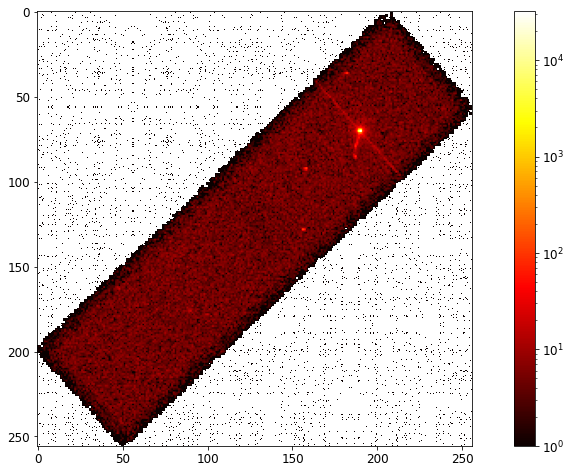

In [358]:
from matplotlib.colors import LogNorm
plt.imshow(imageQuasar[:][::-1], cmap='hot', norm = LogNorm())
plt.colorbar()

## 5A. Spectrum

Assuming no correction for background, and that we do the analysis assuming the background flux as noise, since they are of a order of magnitude lower in comparision

In [359]:
energyQuasar.min(), energyQuasar.max(), energyQuasar.size

(137.97464, 18094.805, 142550)

In [360]:
binSizeQuasar = 3000
energyPtQuasar = np.linspace(energyQuasar.min(), energyQuasar.max(), binSizeQuasar)
fluxPtQuasar = []
for i in range(binSizeQuasar-1):
    print(i)
    fluxPtQuasar.append(((energyQuasar>energyPtQuasar[i])&(energyQuasar<energyPtQuasar[i+1])).sum())
                  
fluxPtQuasar = np.array(fluxPtQuasar)
fluxErrorQuasar = np.sqrt(fluxPtQuasar)
fluxPtQuasar = np.append(fluxPtQuasar, 0)
fluxErrorQuasar = np.append(fluxErrorQuasar,0)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

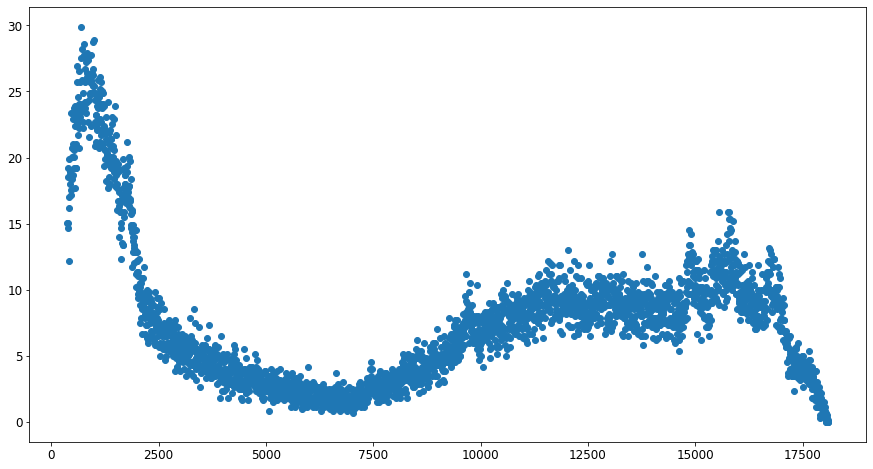

In [361]:
plt.scatter(energyPtQuasar[40:], 0.1670*fluxPtQuasar[40:])

<ErrorbarContainer object of 3 artists>

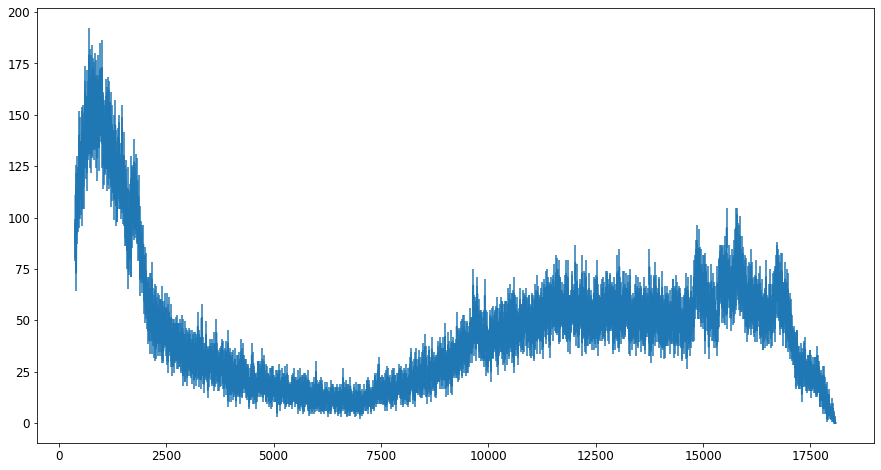

In [362]:
plt.errorbar(energyPtQuasar[40:], fluxPtQuasar[40:], fluxErrorQuasar[40:])

In [363]:
from naima.models import ExponentialCutoffPowerLaw, InverseCompton

flux_unit = fluxTableQuasar['flux'].unit
def cutOffExp(pars, data):
    amplitude = pars[0] * flux_unit
    alpha = pars[1]
    e_cutoff = (10**pars[2])*u.eV
    e_0 = (10**pars[3])*u.eV
    ECPL = ExponentialCutoffPowerLaw(amplitude, 10000*u.eV, alpha, e_cutoff)
    return ECPL(data)

In [364]:
from naima import uniform_prior
def lnprior(pars):
    logprob = naima.uniform_prior(pars[0],0.,np.inf) + naima.uniform_prior(pars[1],-1,5)
    return logprob


In [365]:
fluxTableQuasar = naima.build_data_table(energyPtQuasar[40:]*(u.eV), fluxPtQuasar[40:]*(0.1670/(u.s*u.eV)), fluxErrorQuasar[40:]*(0.1670/(u.s*u.eV)))
fluxTableQuasar

energy,flux,flux_error
eV,1 / (eV s),1 / (eV s)
float64,float64,float64
377.4788752724704,15.030000000000001,1.584301107744358
383.4664811569677,14.696000000000002,1.5665988637810255
389.454087041465,18.537000000000003,1.7594541767264074
395.44169292596234,15.030000000000001,1.584301107744358
401.4292988104596,19.205000000000002,1.7908754842255226
407.41690469495694,12.191,1.4268486254680277
413.4045105794542,17.034000000000002,1.686617324706467
419.39211646395154,19.873,1.8217549231441643


## 6A Plotting the Light Curve:

In [366]:
binSizeQuasar = 3000
timePtQuasar = np.linspace(timeQuasar.min(), timeQuasar.max(), binSizeQuasar)
fluxPtQuasar = []
for i in range(binSizeQuasar-1):
    fluxPtQuasar.append(((timeQuasar>timePtQuasar[i])&(timeQuasar<timePtQuasar[i+1])).sum())
                  
fluxPtQuasar = np.array(fluxPtQuasar)
fluxPtQuasar = np.append(fluxPtQuasar, 0)


In [367]:
timePtQuasar = timePtQuasar[:-1]
fluxPtQuasar = fluxPtQuasar[:-1]
dTimeQuasar = timePtQuasar[1]-timePtQuasar[0]
dTimeQuasar

24.165345430374146

In [368]:
timePtQuasar.size, fluxPtQuasar.size

(2999, 2999)

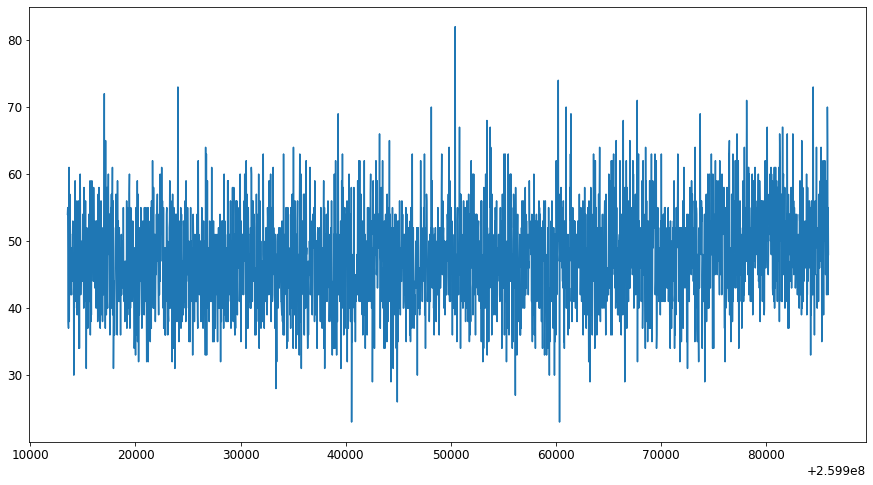

In [369]:
lcQuasar = Lightcurve(timePtQuasar[:-1], fluxPtQuasar[:-1], dt = dTimeQuasar, skip_checks = True)
lcQuasar.plot()

## 7A. RMS Internsity Diagram:

In [370]:
import matplotlib as mpl
import seaborn

from matplotlib import pyplot as plt

import stingray as sr

from stingray import Lightcurve, Powerspectrum, AveragedPowerspectrum, Crossspectrum, AveragedCrossspectrum
from stingray import events
from stingray.events import EventList
import glob
import numpy as np
from astropy.modeling import models, fitting

from stingray.utils import excess_variance

In [371]:
mpl.rcParams['figure.figsize']=(15.0,8.0)
mpl.rcParams['font.size']=12
mpl.rcParams['savefig.dpi']=100

In [372]:
def fvar_fun(lc):
    return excess_variance(lc, normalization='fvar')

def norm_exc_var_fun(lc):
    return excess_variance(lc, normalization='norm_xs')

def exc_var_fun(lc):
    return excess_variance(lc, normalization='none')

def rate_fun(lc):
    return lc.meancounts, np.std(lc.counts)

/usr/local/lib/python3.7/dist-packages/stingray/utils.py:739: RuntimeWarning: invalid value encountered in sqrt
  fvar = np.sqrt(var_xs / mean_ctvar)


Text(0, 0.5, '$F_{\\rm var}$')

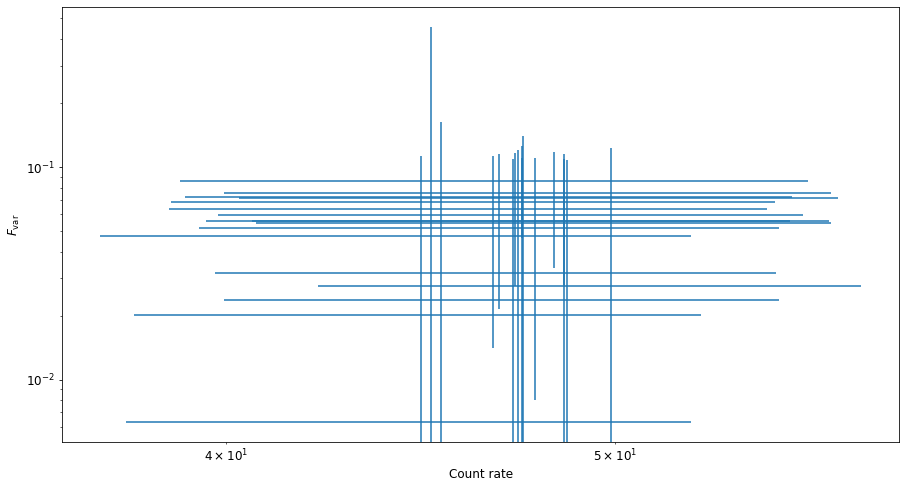

In [373]:
start, stop, res = lcQuasar.analyze_lc_chunks(1000, np.var)
var = res

start, stop, res = lcQuasar.analyze_lc_chunks(1000, rate_fun)
rate, rate_err = res

start, stop, res = lcQuasar.analyze_lc_chunks(1000, fvar_fun)
fvar, fvar_err = res

start, stop, res = lcQuasar.analyze_lc_chunks(1000, exc_var_fun)
evar, evar_err = res

start, stop, res = lcQuasar.analyze_lc_chunks(1000, norm_exc_var_fun)
nvar, nvar_err = res

plt.errorbar(rate, fvar, xerr=rate_err, yerr=fvar_err, fmt='none')
plt.loglog()
plt.xlabel('Count rate')
plt.ylabel(r'$F_{\rm var}$')

In [374]:
tmean = (start + stop)/2

Text(0, 0.5, '$\\sigma_{NXS}$')

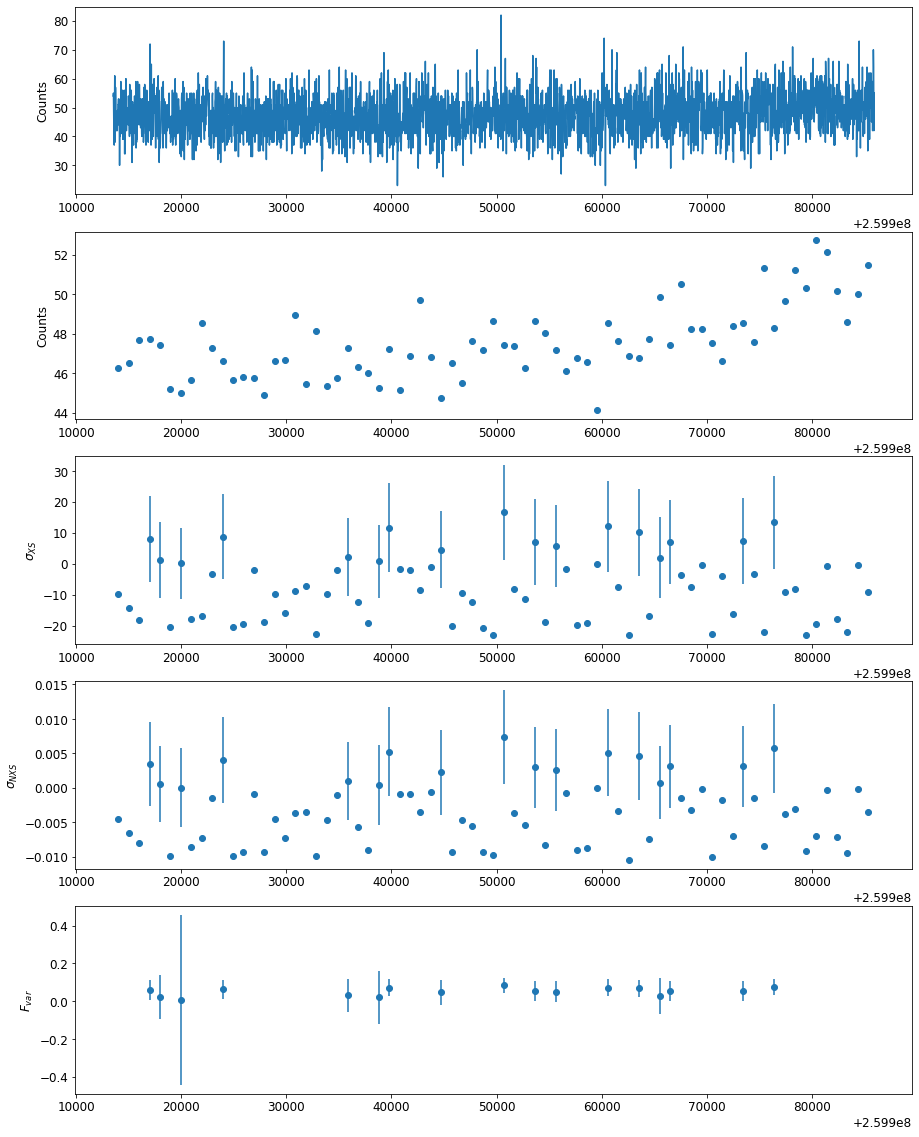

In [375]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(15, 20))
gs = GridSpec(5, 1)
ax_lc = plt.subplot(gs[0])
ax_mean = plt.subplot(gs[1], sharex=ax_lc)
ax_evar = plt.subplot(gs[2], sharex=ax_lc)
ax_nvar = plt.subplot(gs[3], sharex=ax_lc)
ax_fvar = plt.subplot(gs[4], sharex=ax_lc)

ax_lc.plot(lc.time, lc.counts)
ax_lc.set_ylabel('Counts')
ax_mean.scatter(tmean, rate)
ax_mean.set_ylabel('Counts')

ax_evar.errorbar(tmean, evar, yerr=evar_err, fmt='o')
ax_evar.set_ylabel(r'$\sigma_{XS}$')

ax_fvar.errorbar(tmean, fvar, yerr=fvar_err, fmt='o')
ax_fvar.set_ylabel(r'$F_{var}$')

ax_nvar.errorbar(tmean, nvar, yerr=nvar_err, fmt='o')
ax_nvar.set_ylabel(r'$\sigma_{NXS}$')

## 8A. Power Spectrum:

In [376]:
energyQuasar, timeQuasar

(array([12066.586  ,   306.5475 ,   479.92664, ..., 13801.64   ,
        17506.143  , 16250.781  ], dtype=float32),
 array([2.59913530e+08, 2.59913530e+08, 2.59913530e+08, ...,
        2.59986002e+08, 2.59986002e+08, 2.59986002e+08]))

In [377]:
energyQuasar.size, timeQuasar.size

(142550, 142550)

In [378]:
energyQuasar.min(), energyQuasar.max(), timeQuasar.min()-timeQuasar.max()

(137.97464, 18094.805, -72471.87096378207)

In [379]:
def generateDynamicSpectrum(energyBin, timeBin, energy, time):
    imageArray = []
    energyBinned = np.linspace(energy.min(), energy.max(), energyBin+1)
    timeBinned = np.linspace(time.min(), time.max(), timeBin+1)
    energyBinned = np.array(energyBinned)
    timeBinned = np.array(timeBinned)
     
    for j in range(len(timeBinned)-1):
        imageX = []
        for i in range(len(energyBinned)-1):
            imageX.append(((energy<energyBinned[i+1])&(energy>energyBinned[i])&(time<timeBinned[j+1])&(time>timeBinned[j])).sum())
            print(i, j)
        imageArray.append(imageX)
    return imageArray

In [380]:
dynamicSpectrumQuasar = generateDynamicSpectrum(256, 256, energyQuasar, timeQuasar)

Streaming output truncated to the last 5000 lines.
120 236
121 236
122 236
123 236
124 236
125 236
126 236
127 236
128 236
129 236
130 236
131 236
132 236
133 236
134 236
135 236
136 236
137 236
138 236
139 236
140 236
141 236
142 236
143 236
144 236
145 236
146 236
147 236
148 236
149 236
150 236
151 236
152 236
153 236
154 236
155 236
156 236
157 236
158 236
159 236
160 236
161 236
162 236
163 236
164 236
165 236
166 236
167 236
168 236
169 236
170 236
171 236
172 236
173 236
174 236
175 236
176 236
177 236
178 236
179 236
180 236
181 236
182 236
183 236
184 236
185 236
186 236
187 236
188 236
189 236
190 236
191 236
192 236
193 236
194 236
195 236
196 236
197 236
198 236
199 236
200 236
201 236
202 236
203 236
204 236
205 236
206 236
207 236
208 236
209 236
210 236
211 236
212 236
213 236
214 236
215 236
216 236
217 236
218 236
219 236
220 236
221 236
222 236
223 236
224 236
225 236
226 236
227 236
228 236
229 236
230 236
231 236
232 236
233 236
234 236
235 236
236 236
237 236
238 2

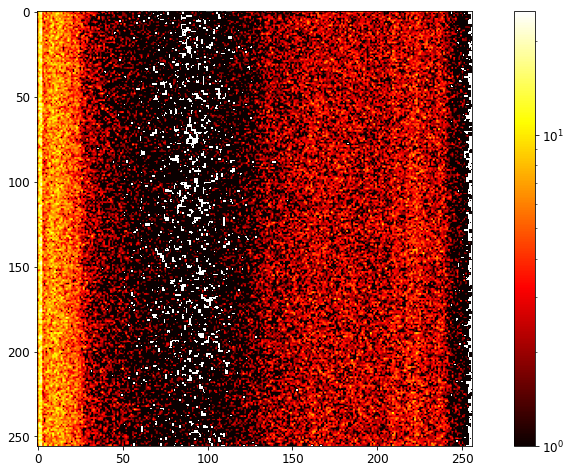

In [381]:
from matplotlib.colors import LogNorm
plt.imshow(np.array(dynamicSpectrumQuasar)[:, :], cmap='hot', norm = LogNorm())
plt.colorbar()

# B. Pulsar Analysis:

### 3B. Extracting data:

In [382]:
timePulsar = hdulPulsar[1].data['time']
energyPulsar = hdulPulsar[1].data['energy']
xCoordPulsar = hdulPulsar[1].data['x']
yCoordPulsar = hdulPulsar[1].data['y']

## 4B. Checking GTI Filter:

In [383]:
(timePulsar.min(), timePulsar.max())

(87856338.07354109, 87862528.39622007)

In [384]:
gtiQuasar = hdulQuasar[2].data[0]
gtiQuasar 

(259913529.8869672, 259986002.68804714)

Clearly no GTI correction need be applied, since the times are already within the GTI

## 5B. Plotting the image:

In [385]:
def generateImage(xPixels, yPixels, xCoord, yCoord):
    imageArray = []
    xCoordBin = np.linspace(xCoord.min(), xCoord.max(), xPixels+1)
    yCoordBin = np.linspace(yCoord.min(), yCoord.max(), yPixels+1)
    xCoord = np.array(xCoord)
    yCoord = np.array(yCoord)
     
    for j in range(len(yCoordBin)-1):
        imageX = []
        for i in range(len(xCoordBin)-1):
            imageX.append(((xCoord<xCoordBin[i+1])&(xCoord>xCoordBin[i])&(yCoord<yCoordBin[j+1])&(yCoord>yCoordBin[j])).sum())
            print(i, j)
        imageArray.append(imageX)
    return imageArray

In [386]:
imagePulsar = generateImage(256, 256, xCoordPulsar, yCoordPulsar)

Streaming output truncated to the last 5000 lines.
120 236
121 236
122 236
123 236
124 236
125 236
126 236
127 236
128 236
129 236
130 236
131 236
132 236
133 236
134 236
135 236
136 236
137 236
138 236
139 236
140 236
141 236
142 236
143 236
144 236
145 236
146 236
147 236
148 236
149 236
150 236
151 236
152 236
153 236
154 236
155 236
156 236
157 236
158 236
159 236
160 236
161 236
162 236
163 236
164 236
165 236
166 236
167 236
168 236
169 236
170 236
171 236
172 236
173 236
174 236
175 236
176 236
177 236
178 236
179 236
180 236
181 236
182 236
183 236
184 236
185 236
186 236
187 236
188 236
189 236
190 236
191 236
192 236
193 236
194 236
195 236
196 236
197 236
198 236
199 236
200 236
201 236
202 236
203 236
204 236
205 236
206 236
207 236
208 236
209 236
210 236
211 236
212 236
213 236
214 236
215 236
216 236
217 236
218 236
219 236
220 236
221 236
222 236
223 236
224 236
225 236
226 236
227 236
228 236
229 236
230 236
231 236
232 236
233 236
234 236
235 236
236 236
237 236
238 2

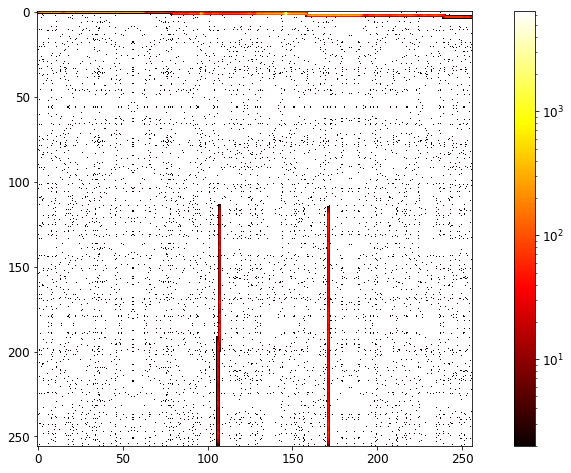

In [387]:
from matplotlib.colors import LogNorm
plt.imshow(imagePulsar[:][::-1], cmap='hot', norm = LogNorm())
plt.colorbar()

## 6B. Spectrum:

In [388]:
energyPulsar.min(), energyPulsar.max(), energyPulsar.size

(0.0, 17970.688, 70637)

In [389]:
binSizePulsar = 3000
energyPtPulsar = np.linspace(energyPulsar.min(), energyPulsar.max(), binSizePulsar)
fluxPtPulsar = []
for i in range(binSizePulsar-1):
    print(i)
    fluxPtPulsar.append(((energyPulsar>energyPtPulsar[i])&(energyPulsar<energyPtPulsar[i+1])).sum())
                  
fluxPtPulsar = np.array(fluxPtPulsar)
fluxErrorPulsar = np.sqrt(fluxPtPulsar)
fluxPtPulsar = np.append(fluxPtPulsar, 0)
fluxErrorPulsar = np.append(fluxErrorPulsar,0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

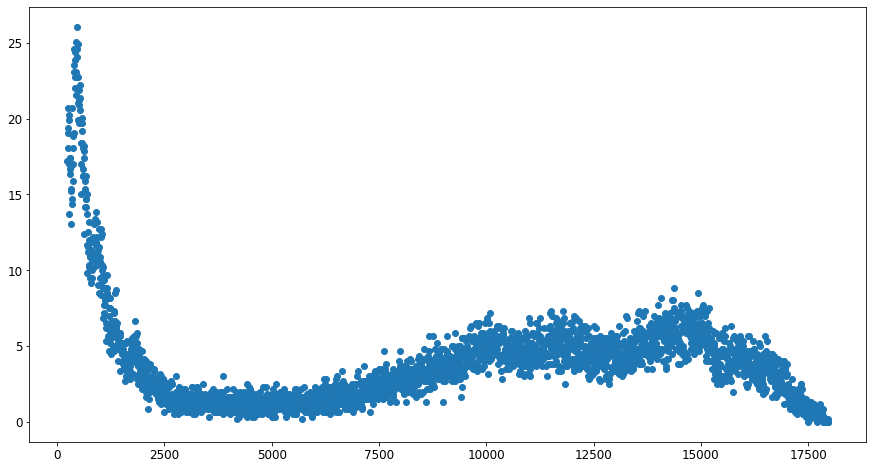

In [390]:
plt.scatter(energyPtPulsar[40:], 0.1670*fluxPtPulsar[40:])

<ErrorbarContainer object of 3 artists>

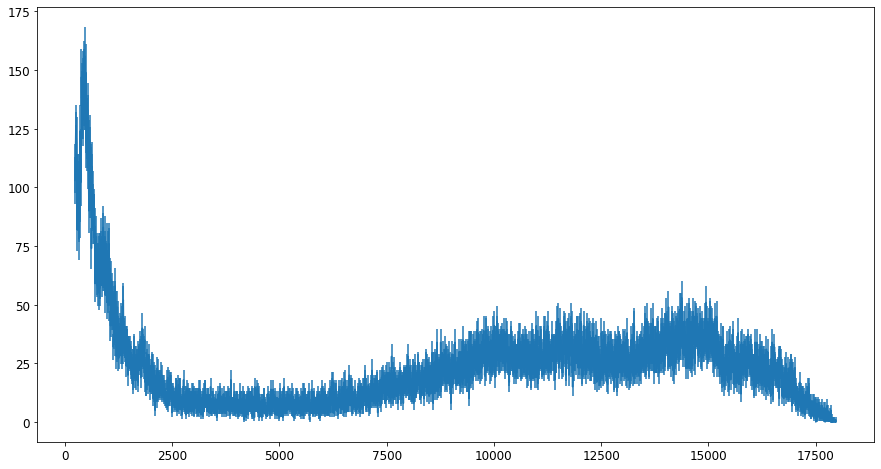

In [391]:
plt.errorbar(energyPtPulsar[40:], fluxPtPulsar[40:], fluxErrorPulsar[40:])

## 7B. Plotting the Light Curve

In [392]:
binSizePulsar = 3000
timePtPulsar = np.linspace(timePulsar.min(), timePulsar.max(), binSizePulsar)
fluxPtPulsar = []
for i in range(binSizePulsar-1):
    fluxPtPulsar.append(((timePulsar>timePtPulsar[i])&(timePulsar<timePtPulsar[i+1])).sum())
                  
fluxPtPulsar = np.array(fluxPtPulsar)
fluxPtPulsar = np.append(fluxPtPulsar, 0)


In [393]:
timePtPulsar = timePtPulsar[:-1]
fluxPtPulsar = fluxPtPulsar[:-1]
dTimePulsar = timePtPulsar[1]-timePtPulsar[0]
dTimePulsar

2.0641289353370667

In [394]:
timePtPulsar.size, fluxPtPulsar.size

(2999, 2999)

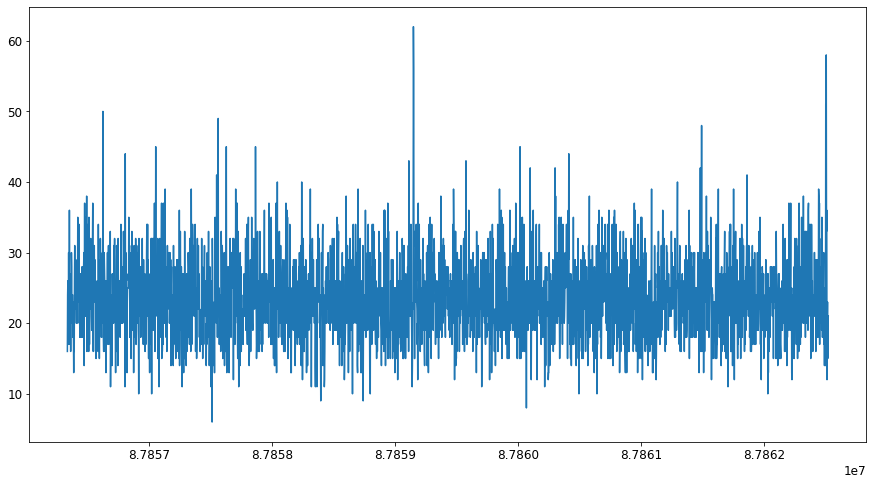

In [395]:
lcPulsar = Lightcurve(timePtPulsar[:-1], fluxPtPulsar[:-1], dt = dTimePulsar, skip_checks = True)
lcPulsar.plot()

## 8B. RMS Intensity Diagram

In [396]:
import matplotlib as mpl
import seaborn

from matplotlib import pyplot as plt

import stingray as sr

from stingray import Lightcurve, Powerspectrum, AveragedPowerspectrum, Crossspectrum, AveragedCrossspectrum
from stingray import events
from stingray.events import EventList
import glob
import numpy as np
from astropy.modeling import models, fitting

from stingray.utils import excess_variance

In [397]:
mpl.rcParams['figure.figsize']=(15.0,8.0)
mpl.rcParams['font.size']=12
mpl.rcParams['savefig.dpi']=100

In [398]:
def fvar_fun(lc):
    return excess_variance(lc, normalization='fvar')

def norm_exc_var_fun(lc):
    return excess_variance(lc, normalization='norm_xs')

def exc_var_fun(lc):
    return excess_variance(lc, normalization='none')

def rate_fun(lc):
    return lc.meancounts, np.std(lc.counts)

Text(0, 0.5, '$F_{\\rm var}$')

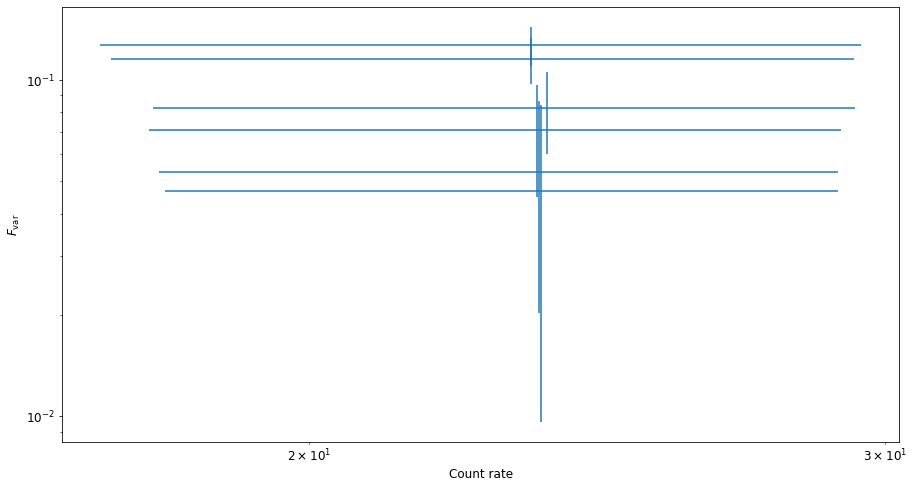

In [399]:
start, stop, res = lcPulsar.analyze_lc_chunks(1000, np.var)
var = res

start, stop, res = lcPulsar.analyze_lc_chunks(1000, rate_fun)
rate, rate_err = res

start, stop, res = lcPulsar.analyze_lc_chunks(1000, fvar_fun)
fvar, fvar_err = res

start, stop, res = lcPulsar.analyze_lc_chunks(1000, exc_var_fun)
evar, evar_err = res

start, stop, res = lcPulsar.analyze_lc_chunks(1000, norm_exc_var_fun)
nvar, nvar_err = res

plt.errorbar(rate, fvar, xerr=rate_err, yerr=fvar_err, fmt='none')
plt.loglog()
plt.xlabel('Count rate')
plt.ylabel(r'$F_{\rm var}$')

In [400]:
tmean = (start + stop)/2

Text(0, 0.5, '$\\sigma_{NXS}$')

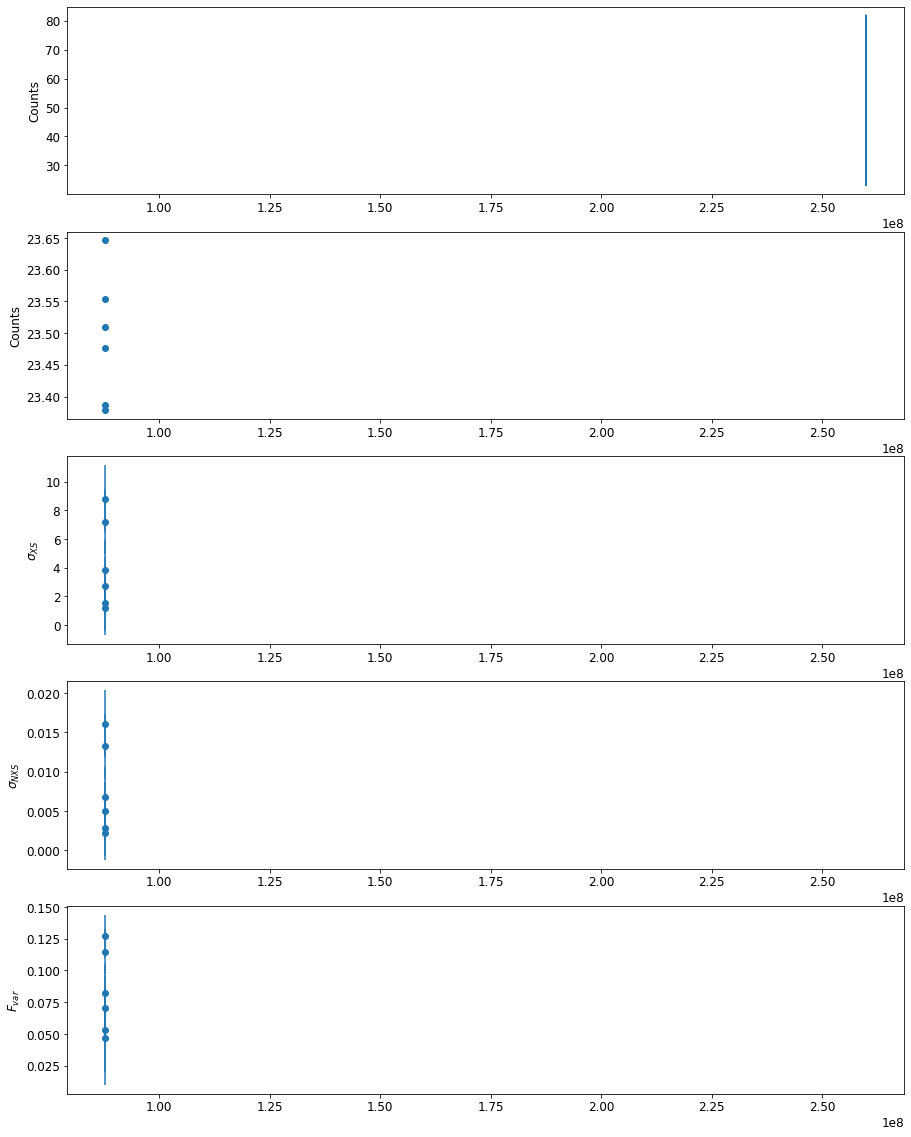

In [401]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize=(15, 20))
gs = GridSpec(5, 1)
ax_lc = plt.subplot(gs[0])
ax_mean = plt.subplot(gs[1], sharex=ax_lc)
ax_evar = plt.subplot(gs[2], sharex=ax_lc)
ax_nvar = plt.subplot(gs[3], sharex=ax_lc)
ax_fvar = plt.subplot(gs[4], sharex=ax_lc)

ax_lc.plot(lc.time, lc.counts)
ax_lc.set_ylabel('Counts')
ax_mean.scatter(tmean, rate)
ax_mean.set_ylabel('Counts')

ax_evar.errorbar(tmean, evar, yerr=evar_err, fmt='o')
ax_evar.set_ylabel(r'$\sigma_{XS}$')

ax_fvar.errorbar(tmean, fvar, yerr=fvar_err, fmt='o')
ax_fvar.set_ylabel(r'$F_{var}$')

ax_nvar.errorbar(tmean, nvar, yerr=nvar_err, fmt='o')
ax_nvar.set_ylabel(r'$\sigma_{NXS}$')

## 9B. Power Spectrum 

In [402]:
energyPulsar, timePulsar

(array([14703.818  ,   584.17285, 13494.748  , ..., 14508.659  ,
        11706.767  , 15580.357  ], dtype=float32),
 array([87856338.07354109, 87856338.36395489, 87856338.35732038, ...,
        87862528.35071045, 87862528.31123623, 87862528.39622007]))

In [403]:
energyPulsar.size, timePulsar.size

(70637, 70637)

In [404]:
def generateDynamicSpectrum(energyBin, timeBin, energy, time):
    imageArray = []
    energyBinned = np.linspace(energy.min(), energy.max(), energyBin+1)
    timeBinned = np.linspace(time.min(), time.max(), timeBin+1)
    energyBinned = np.array(energyBinned)
    timeBinned = np.array(timeBinned)
     
    for j in range(len(timeBinned)-1):
        imageX = []
        for i in range(len(energyBinned)-1):
            imageX.append(((energy<energyBinned[i+1])&(energy>energyBinned[i])&(time<timeBinned[j+1])&(time>timeBinned[j])).sum())
            print(i, j)
        imageArray.append(imageX)
    return imageArray

In [405]:
dynamicSpectrumPulsar = generateDynamicSpectrum(256, 256, energyPulsar, timePulsar)

Streaming output truncated to the last 5000 lines.
120 236
121 236
122 236
123 236
124 236
125 236
126 236
127 236
128 236
129 236
130 236
131 236
132 236
133 236
134 236
135 236
136 236
137 236
138 236
139 236
140 236
141 236
142 236
143 236
144 236
145 236
146 236
147 236
148 236
149 236
150 236
151 236
152 236
153 236
154 236
155 236
156 236
157 236
158 236
159 236
160 236
161 236
162 236
163 236
164 236
165 236
166 236
167 236
168 236
169 236
170 236
171 236
172 236
173 236
174 236
175 236
176 236
177 236
178 236
179 236
180 236
181 236
182 236
183 236
184 236
185 236
186 236
187 236
188 236
189 236
190 236
191 236
192 236
193 236
194 236
195 236
196 236
197 236
198 236
199 236
200 236
201 236
202 236
203 236
204 236
205 236
206 236
207 236
208 236
209 236
210 236
211 236
212 236
213 236
214 236
215 236
216 236
217 236
218 236
219 236
220 236
221 236
222 236
223 236
224 236
225 236
226 236
227 236
228 236
229 236
230 236
231 236
232 236
233 236
234 236
235 236
236 236
237 236
238 2

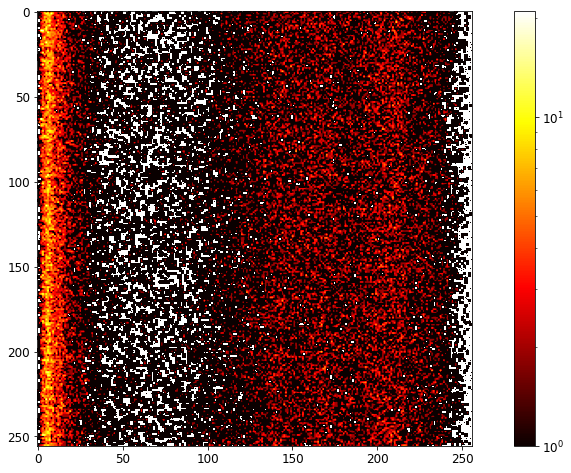

In [406]:
from matplotlib.colors import LogNorm
plt.imshow(np.array(dynamicSpectrumPulsar)[:, :], cmap='hot', norm = LogNorm())
plt.colorbar()